In [1]:
# %% init
import os
os.chdir("/home/tangir/crmbm/python/pastis")

from IPython import get_ipython
get_ipython().magic("clear")

import matplotlib.pylab as plt
import mrs.reco as reco
import mrs.log as log
import numpy as np

plt.close("all")
plt.rcParams['figure.dpi'] = 75
plt.rcParams['figure.max_open_warning'] = 1000
plt.rcParams["figure.figsize"] = [8, 6]
# get_ipython().magic("matplotlib inline")
get_ipython().magic("matplotlib notebook")
log.setLevel(log.INFO)


(DEBUG) Loaded backend nbAgg version unknown.


# 05/11/2019 - 328-af-p1-moelle - Anne, test apnea/breath hold

Rare problem here! The acquisition was interrupted and the twix is therefore "corrupted". Suspect's routine fails, mapvbbd (python) succeed but gives weird data. I could only find Matlab's mapvbvd, therefore the raw data is stored in a mat file. 

(INFO)  reco.py.__new__: reading data file...
(INFO)  reco.py.__new__: /home/tangir/crmbm/acq_twix/328-af-p1-moelle/meas_MID69_steam_shortTE_SNR+_FID45776.dat
Scan 1/1, read all mdhs:   0%|          | 0.00/31.4M [00:00<?, ?B/s]/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/mapvbvd/mapVBVD.py:89: UserWarning: 
An unexpected read error occurred at this byte offset: 32958144 (0.030694663524627686 GiB)
Will stop reading now.

  warnings.warn(warningString)
Scan 1/1, read all mdhs: 100%|█████████▉| 31.3M/31.4M [00:00<00:00, 1.32GB/s]
read data:   0%|          | 0/231 [00:00<?, ?it/s]

pymapVBVD version 0.4.1
Software version: VB


(INFO)  reco.py.__new__: read a (232, 8, 2048) vector        
(WARNING) SIEMENS_data_file_reader.read_param_num: could not find parameter [lPreparingScans]! :(
(WARNING) SIEMENS_data_file_reader._get_sequence_acquisition_time_effective: cannot extract effective acquisition time from a TWIX file :(
(WARNING) MRSData2.correct_phase_3d: you want to phase data based on ref. data but no such data is available!


phasing: ██████████████████████████████ done.


(WARNING) MRSData2.correct_combine_channels_3d: you want to channel-combine data based on ref. data but no such data is available!


<IPython.core.display.Javascript object>


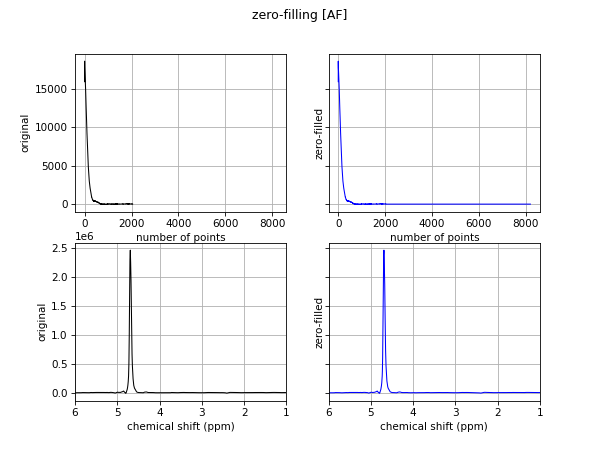

In [6]:
plt.close("all")
raw_data_file = "/home/tangir/crmbm/acq_twix/328-af-p1-moelle/meas_MID69_steam_shortTE_SNR+_FID45776.dat"
physio_file = "/home/tangir/crmbm/acq_physio/328_AF_P1_MOELLE.resp"

s = reco.MRSData2(raw_data_file, physio_file)

import scipy.io
mat = scipy.io.loadmat("/home/tangir/crmbm/acq_twix/328-af-p1-moelle/fids.mat")
data_from_mat = mat["out"][0][0][0]
data_from_mat = np.transpose(data_from_mat, (2, 1, 0))
s[:] = data_from_mat[:, :, 0:2048]
s._display_label = "AF"

s = s.correct_phase_3d()
s = s.correct_intensity_scaling_nd()
s = s.correct_combine_channels_3d()
s = s.correct_zerofill_nd(4096 * 2, True)

(INFO)  MRSData2.correct_analyze_and_reject_2d: This is the 1st time we perform data rejection on this signal!
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Pre-data-rejection SNR = 13532.41
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Pre-data-rejection linewidth = 9.16 Hz


analyzing: ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: peak analysis: means ± std. deviations
(INFO)  MRSData2.correct_analyze_and_reject_2d: rel. peak amplitude = 0.00 ± 6.79 %
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. linewidth = 8.9 ± 1.3 Hz (0.030 ± 0.004 ppm)
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. frequency = 4.69 ± 0.01 ppm (± 3.8 Hz)
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. phase = 0.01 ± 0.20 rad


rejecting data: ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: data rejection: summary (round #1)
(INFO)  MRSData2.correct_analyze_and_reject_2d: number of averages rejected because of...
(INFO)  MRSData2.correct_analyze_and_reject_2d: amplitude = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: linewidth = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: frequency = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: phase = 0


realigning:  done.


/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3370: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
(INFO)  MRSData2.correct_analyze_and_reject_2d: TOTAL data rejection = 0 / 232 (0%)


analyzing: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


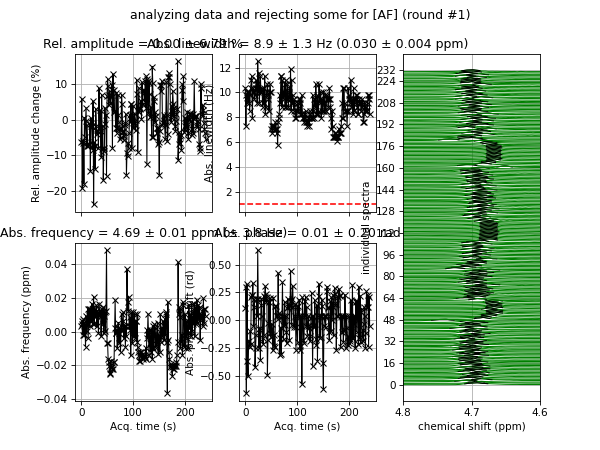

realigning: ██████████████████████████████ done.
realigning: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


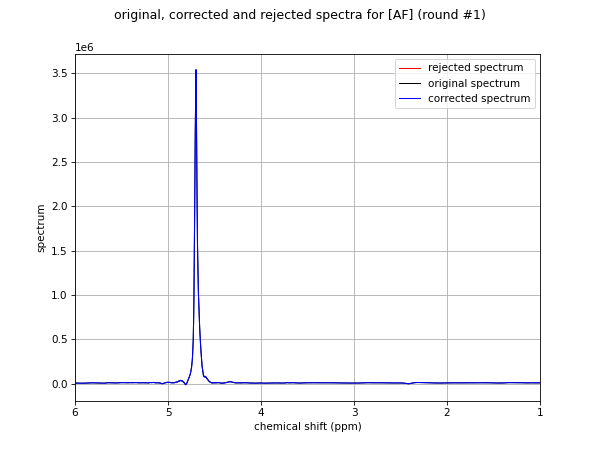

(INFO)  MRSData2.correct_analyze_and_reject_2d: * Final post-data-rejection SNR = 13532.41
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Final post-data-rejection linewidth = 9.16 Hz


analyzing: ██████████████████████████████ done.
correlating signals: ██████████████████████████████ done.


(INFO)  MRSData2.analyze_physio_2d: data timestamp=	57180797.5ms	15:53:00
(INFO)  MRSData2.analyze_physio_2d: best start time for...
(INFO)  MRSData2.analyze_physio_2d: amplitude=		57192150.5ms	15:53:12
(INFO)  MRSData2.analyze_physio_2d: linewidth=		57197984.5ms	15:53:17
(INFO)  MRSData2.analyze_physio_2d: frequency=		57195914.5ms	15:53:15
(INFO)  MRSData2.analyze_physio_2d: phase=		57179695.5ms	15:52:59
(INFO)  MRSData2.analyze_physio_2d: total=		57198060.5ms	15:53:18
(INFO)  MRSData2.analyze_physio_2d: max R for=		57197984.5ms	15:53:17


<IPython.core.display.Javascript object>


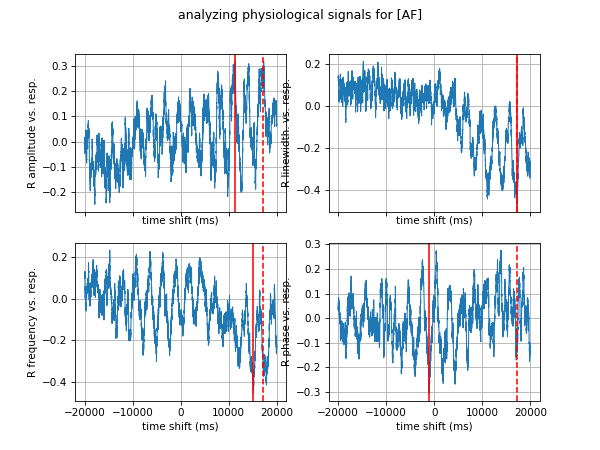

<IPython.core.display.Javascript object>


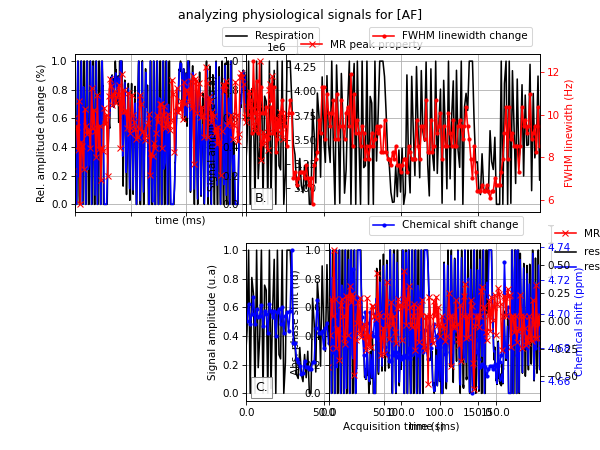

<IPython.core.display.Javascript object>


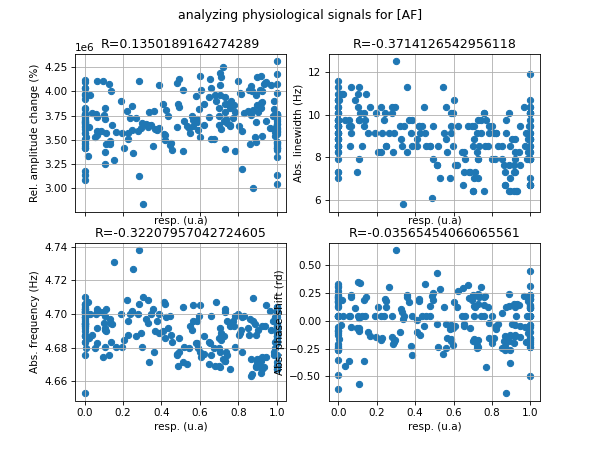

<IPython.core.display.Javascript object>


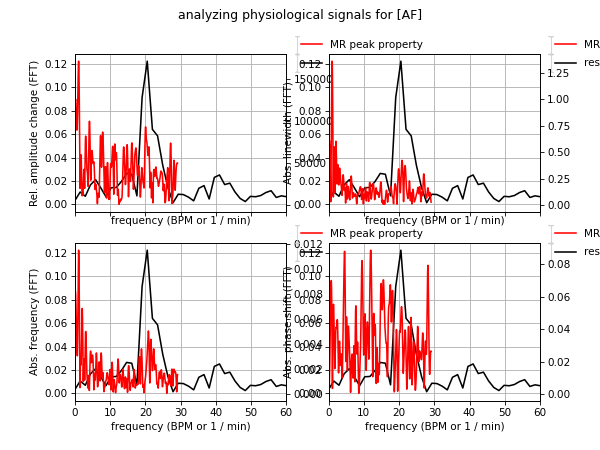

In [10]:
s.correct_analyze_and_reject_2d([4.6, 4.8], 1, {"amplitude (%)": None, "linewidth (Hz)": None, "chemical shift (ppm)": None, "phase std. factor (%)": None}, True, None, 0.0, True, [1, 6])
s.analyze_physio_2d([4.6, 4.8], 40000.0, True)

<IPython.core.display.Javascript object>


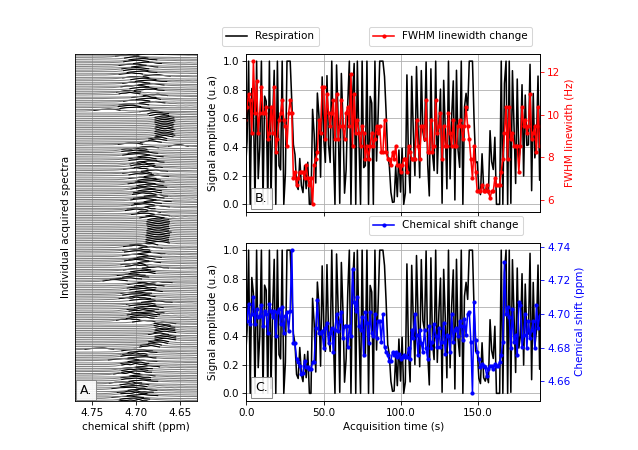

/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator


In [12]:
new_fig = plt.figure(300, figsize=(8.5,6))

new_fig.subplots_adjust(wspace=0.4, hspace=0.2)

# get invidual spectra fig
fig = plt.figure(162)
axs = fig.axes
ax = axs[-1]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(131)
ax.set_position(dummy.get_position())
dummy.remove()

# get linewidth
fig = plt.figure(101)
axs = fig.axes
ax = axs[1]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(2,3,(2,3))
ax.set_position(dummy.get_position())
dummy.remove()

ax = axs[5]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(2,3,(2,3))
ax.set_position(dummy.get_position())
dummy.remove()

# get chemical shift
fig = plt.figure(101)
axs = fig.axes
ax = axs[2]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(2,3,(5,6))
ax.set_position(dummy.get_position())
dummy.remove()

ax = axs[6]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(2,3,(5,6))
ax.set_position(dummy.get_position())
dummy.remove()

# convert time to seconds
ax = new_fig.axes[1]
orig_t = ax.get_xticks()

new_ylim = [5.720e7, 5.739e7]
if(ax.get_ylim() != new_ylim):
    orig_t = new_fig.axes[2].lines[0].get_xdata()
ax.set_xlim(new_ylim)
current_t = ax.get_xticks()
t = current_t / 1000.0 - new_ylim[0] / 1000.0
ax.set_xticklabels(t)

# remove raw resp lines
if(len(new_fig.axes[1].lines) > 1):
    new_fig.axes[1].lines[0].remove()
    new_fig.axes[3].lines[0].remove()

# change colors and style
for l in new_fig.axes[0].lines[0::2]:
    l.set_color("grey")

new_fig.axes[1].lines[0].set_color('k')
new_fig.axes[2].lines[0].set_color('r')
new_fig.axes[2].lines[0].set_marker('.')
new_fig.axes[3].lines[0].set_color('k')
new_fig.axes[4].lines[0].set_color('b')
new_fig.axes[4].lines[0].set_marker('.')

# labels
new_fig.axes[1].set_xlabel("")
new_fig.axes[3].set_xlabel("Acquisition time (s)")
new_fig.axes[1].lines[0].set_label("Respiration")
new_fig.axes[1].set_ylabel("Signal amplitude (u.a)")
new_fig.axes[2].lines[0].set_label("FWHM linewidth change")
new_fig.axes[2].set_ylabel("FWHM linewidth (Hz)")
new_fig.axes[2].yaxis.label.set_color('red')
new_fig.axes[2].tick_params(axis='y', colors='red')

new_fig.axes[3].lines[0].set_label("Respiration")
new_fig.axes[3].set_ylabel("Signal amplitude (u.a)")
new_fig.axes[4].lines[0].set_label("Chemical shift change")
new_fig.axes[4].set_ylabel("Chemical shift (ppm)")
new_fig.axes[4].yaxis.label.set_color('blue')
new_fig.axes[4].tick_params(axis='y', colors='blue')

# ylim invidual spectra
na_start = np.argmin(np.abs(np.linspace(orig_t[0], orig_t[-1], s.shape[0])  - current_t[0]))
na_stop = np.argmin(np.abs(np.linspace(orig_t[0], orig_t[-1], s.shape[0])  - current_t[-1]))

new_fig.axes[0].set_ylabel("Individual acquired spectra")
if(len(new_fig.axes[0].get_yticks()) > 0):
    yt_orig = new_fig.axes[0].get_yticks()
new_fig.axes[0].set_yticks([])
new_fig.axes[0].set_yticklabels([])

yt_start = yt_orig[-1]  * na_start / s.shape[0]
yt_stop = yt_orig[-1] * na_stop / s.shape[0]

new_fig.axes[0].set_ylim([yt_start, yt_stop])
new_fig.axes[0].set_xlim([4.77, 4.63])

# legend
new_fig.axes[1].legend().remove()
new_fig.axes[2].legend().remove()
new_fig.axes[3].legend().remove()
new_fig.axes[4].legend().remove()

new_fig.axes[1].legend(bbox_to_anchor=(-0.1, 1.02, 1., .102), loc=3)
new_fig.axes[2].legend(bbox_to_anchor=(0.4, 1.02, 1., .102), loc=3)
new_fig.axes[4].legend(bbox_to_anchor=(0.4, 1.02, 1., .102), loc=3)

# annotations...
props = dict(boxstyle='square', facecolor='white', alpha=0.9, edgecolor='grey')

xlim = new_fig.axes[0].get_xlim()
ylim = new_fig.axes[0].get_ylim()
new_fig.axes[0].text(xlim[0] - (xlim[0]-xlim[1])*0.04, 
                     ylim[0] + (ylim[1]-ylim[0])*0.02, 
                     "A.",
                     fontsize=12,
                     bbox=props)

xlim = new_fig.axes[2].get_xlim()
ylim = new_fig.axes[2].get_ylim()
new_fig.axes[2].text(xlim[0] - (xlim[0]-xlim[1])*0.03, 
                     ylim[0] + (ylim[1]-ylim[0])*0.06, 
                     "B.",
                     fontsize=12,
                     bbox=props)

xlim = new_fig.axes[4].get_xlim()
ylim = new_fig.axes[4].get_ylim()
new_fig.axes[4].text(xlim[0] - (xlim[0]-xlim[1])*0.03, 
                     ylim[0] + (ylim[1]-ylim[0])*0.06, 
                     "C.",
                     fontsize=12,
                     bbox=props)

new_fig.savefig("./notebooks/figs/fig_apnea.svg")

# 23/09/2019 - 313-ft-p1-moelle - Fransiska, test respiration

(INFO)  reco.py.__new__: reading data file...
(INFO)  reco.py.__new__: /home/tangir/crmbm/acq_twix/313-ft-p1-moelle/meas_MID60_steam_shortTE_SNR+_FID41492.dat
(INFO)  reco.py.__new__: read a (90, 8, 1024) vector
(WARNING) SIEMENS_data_file_reader._get_sequence_acquisition_time_effective: cannot extract effective acquisition time from a TWIX file :(
(WARNING) MRSData2.correct_phase_3d: you want to phase data based on ref. data but no such data is available!


phasing: ██████████████████████████████ done.


(WARNING) MRSData2.correct_combine_channels_3d: you want to channel-combine data based on ref. data but no such data is available!


<IPython.core.display.Javascript object>

analyzing: ██████████████████████████████ done.
correlating signals: ██████████████████████████████ done.


(INFO)  MRSData2.analyze_physio_2d: data timestamp=	43230157.5ms	12:00:30
(INFO)  MRSData2.analyze_physio_2d: best start time for...
(INFO)  MRSData2.analyze_physio_2d: amplitude=		43228303.5ms	12:00:28
(INFO)  MRSData2.analyze_physio_2d: linewidth=		43226005.5ms	12:00:26
(INFO)  MRSData2.analyze_physio_2d: frequency=		43233640.5ms	12:00:33
(INFO)  MRSData2.analyze_physio_2d: phase=		43242289.5ms	12:00:42
(INFO)  MRSData2.analyze_physio_2d: total=		43233632.5ms	12:00:33
(INFO)  MRSData2.analyze_physio_2d: max R for=		43242289.5ms	12:00:42


<IPython.core.display.Javascript object>


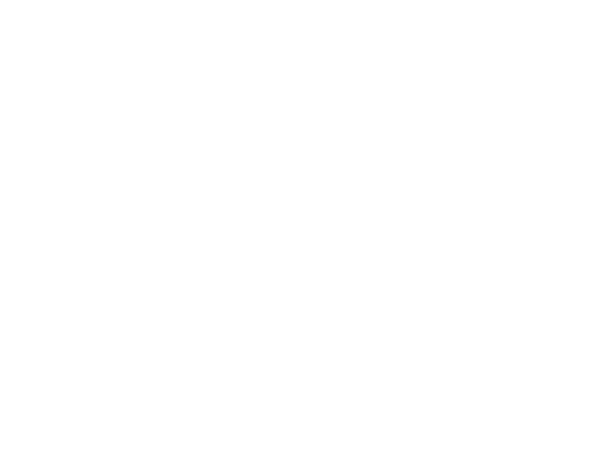

<IPython.core.display.Javascript object>


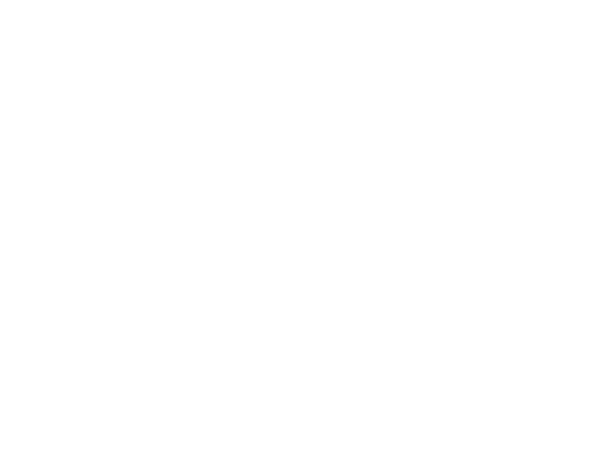

<IPython.core.display.Javascript object>


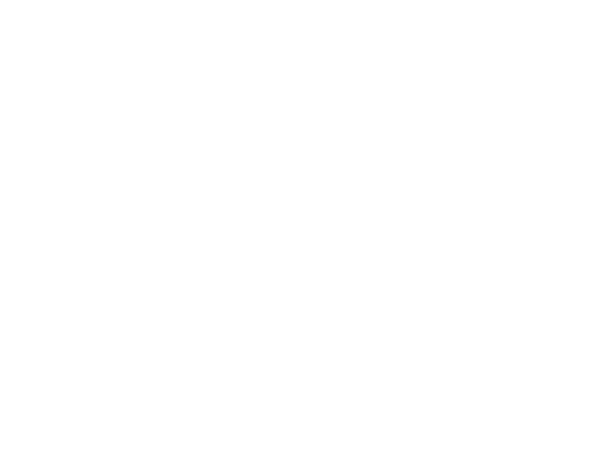

<IPython.core.display.Javascript object>


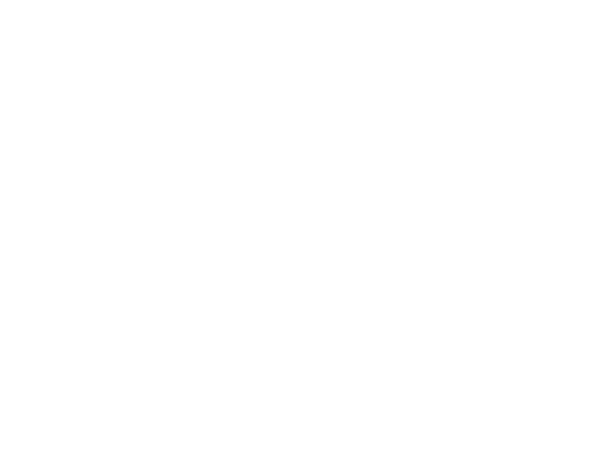

In [13]:
plt.close("all")
raw_data_file = "/home/tangir/crmbm/acq_twix/313-ft-p1-moelle/meas_MID60_steam_shortTE_SNR+_FID41492.dat"
physio_file = "/home/tangir/crmbm/acq_physio/313_FT_P1_MOELLE_1.resp"

s = reco.MRSData2(raw_data_file, physio_file)
s = s.correct_phase_3d()
s = s.correct_intensity_scaling_nd()
s = s.correct_combine_channels_3d()
s = s.correct_zerofill_nd(4096 * 2, True)
s.analyze_physio_2d([4, 5], 40000.0, True)

# 25/09/2019 - 314-yt-p1-moelle - Yolanda, test physio

(INFO)  reco.py.__new__: reading data file...
(INFO)  reco.py.__new__: /home/tangir/crmbm/acq_twix/314-yt-p1-moelle/meas_MID78_steam_shortTE_SNR+_FID41676.dat
(INFO)  reco.py.__new__: read a (128, 8, 512) vector
(WARNING) SIEMENS_data_file_reader._get_sequence_acquisition_time_effective: cannot extract effective acquisition time from a TWIX file :(
(WARNING) MRSData2.correct_phase_3d: you want to phase data based on ref. data but no such data is available!


phasing: ██████████████████████████████ done.


(WARNING) MRSData2.correct_combine_channels_3d: you want to channel-combine data based on ref. data but no such data is available!


<IPython.core.display.Javascript object>


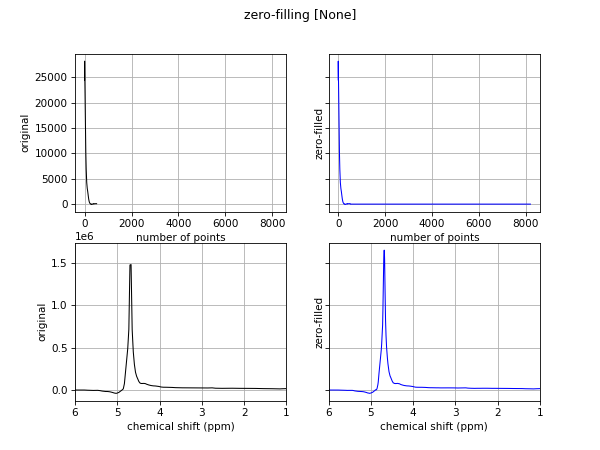

analyzing: ██████████████████████████████ done.
correlating signals: ██████████████████████████████ done.


(INFO)  MRSData2.analyze_physio_2d: data timestamp=	54886652.5ms	15:14:46
(INFO)  MRSData2.analyze_physio_2d: best start time for...
(INFO)  MRSData2.analyze_physio_2d: amplitude=		54887151.5ms	15:14:47
(INFO)  MRSData2.analyze_physio_2d: linewidth=		54868339.5ms	15:14:28
(INFO)  MRSData2.analyze_physio_2d: frequency=		54896180.5ms	15:14:56
(INFO)  MRSData2.analyze_physio_2d: phase=		54903578.5ms	15:15:03
(INFO)  MRSData2.analyze_physio_2d: total=		54895995.5ms	15:14:55
(INFO)  MRSData2.analyze_physio_2d: max R for=		54903578.5ms	15:15:03


<IPython.core.display.Javascript object>


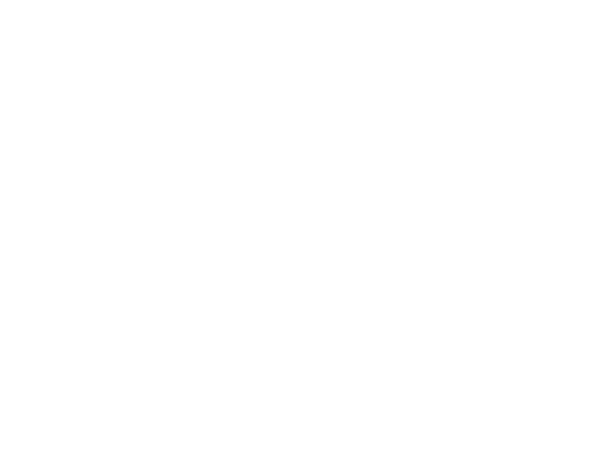

<IPython.core.display.Javascript object>


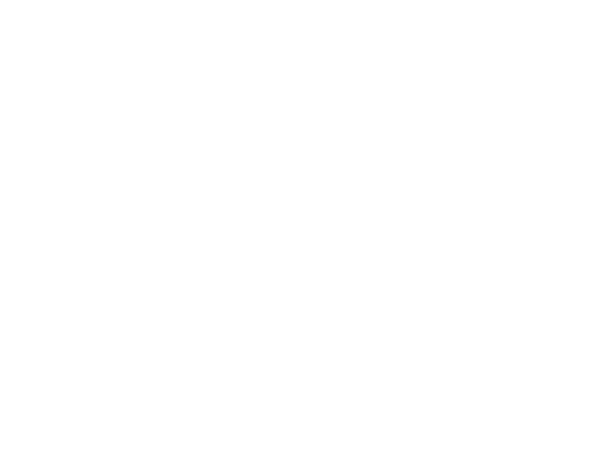

<IPython.core.display.Javascript object>


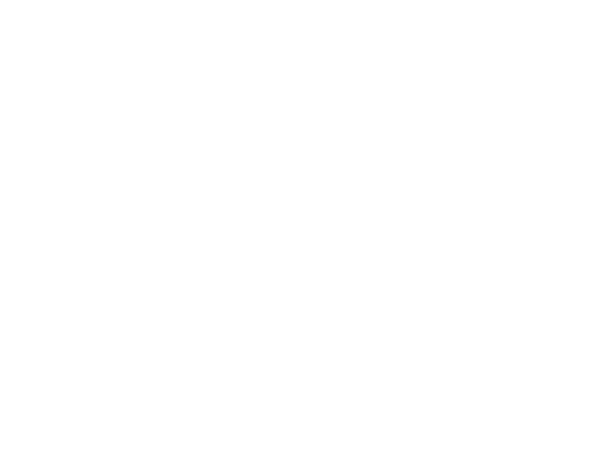

<IPython.core.display.Javascript object>


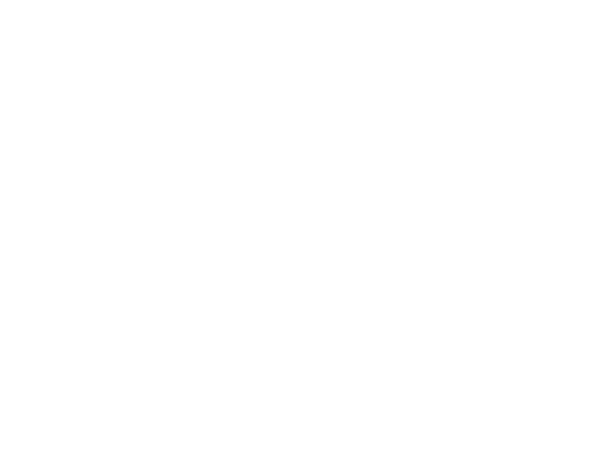

In [14]:
plt.close("all")
raw_data_file = "/home/tangir/crmbm/acq_twix/314-yt-p1-moelle/meas_MID78_steam_shortTE_SNR+_FID41676.dat"
physio_file = "/home/tangir/crmbm/acq_physio/314_YT_P1_MOELLE_1.resp"

s = reco.MRSData2(raw_data_file, physio_file)
s = s.correct_phase_3d()
s = s.correct_intensity_scaling_nd()
s = s.correct_combine_channels_3d()
s = s.correct_zerofill_nd(4096 * 2, True)
s.analyze_physio_2d([4, 5], 40000.0, True)

# 03/10/2019 - 316-ap-p1-moelle - Anissa, test resp

(INFO)  reco.py.__new__: reading data file...
(INFO)  reco.py.__new__: /home/tangir/crmbm/acq_twix/316-ap-p1-moelle/meas_MID44_steam_shortTE_SNR+_FID42203.dat
(INFO)  reco.py.__new__: read a (256, 8, 2048) vector
(WARNING) SIEMENS_data_file_reader.read_param_num: could not find parameter [lPreparingScans]! :(
(WARNING) SIEMENS_data_file_reader._get_sequence_acquisition_time_effective: cannot extract effective acquisition time from a TWIX file :(
(WARNING) MRSData2.correct_phase_3d: you want to phase data based on ref. data but no such data is available!


phasing: ██████████████████████████████ done.


(WARNING) MRSData2.correct_combine_channels_3d: you want to channel-combine data based on ref. data but no such data is available!


<IPython.core.display.Javascript object>


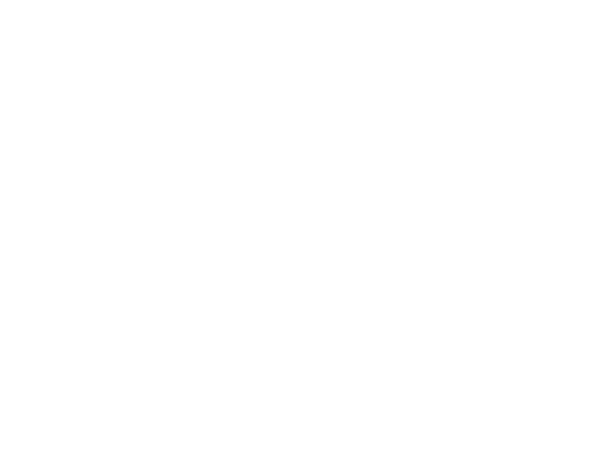

In [15]:
plt.close("all")
raw_data_file = "/home/tangir/crmbm/acq_twix/316-ap-p1-moelle/meas_MID44_steam_shortTE_SNR+_FID42203.dat"
physio_file = "/home/tangir/crmbm/acq_physio/316_AP_P1_MOELLE.resp"

s = reco.MRSData2(raw_data_file, physio_file)
s = s.correct_phase_3d()
s = s.correct_intensity_scaling_nd()
s = s.correct_combine_channels_3d()
s = s.correct_zerofill_nd(4096 * 2, True)
s._display_label = "AP"

(INFO)  MRSData2.correct_analyze_and_reject_2d: This is the 1st time we perform data rejection on this signal!
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Pre-data-rejection SNR = 3402.11
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Pre-data-rejection linewidth = 21.97 Hz


analyzing: ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: peak analysis: means ± std. deviations
(INFO)  MRSData2.correct_analyze_and_reject_2d: rel. peak amplitude = 0.00 ± 6.24 %
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. linewidth = 21.0 ± 2.0 Hz (0.071 ± 0.007 ppm)
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. frequency = 4.73 ± 0.03 ppm (± 7.6 Hz)
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. phase = 0.04 ± 0.14 rad


rejecting data: ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: data rejection: summary (round #1)
(INFO)  MRSData2.correct_analyze_and_reject_2d: number of averages rejected because of...
(INFO)  MRSData2.correct_analyze_and_reject_2d: amplitude = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: linewidth = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: frequency = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: phase = 0


realigning:  done.


/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3370: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
(INFO)  MRSData2.correct_analyze_and_reject_2d: TOTAL data rejection = 0 / 256 (0%)


analyzing: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


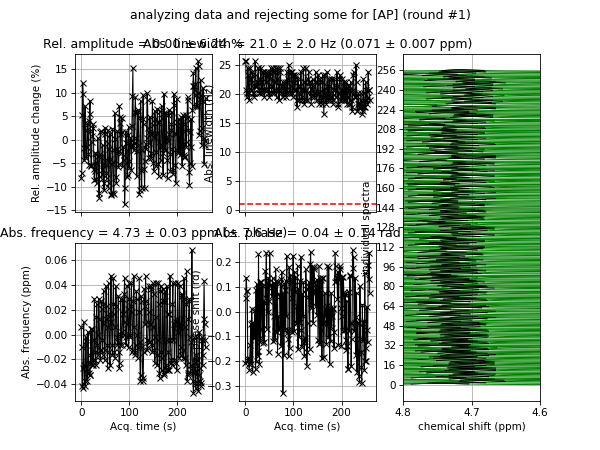

realigning: ██████████████████████████████ done.
realigning: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


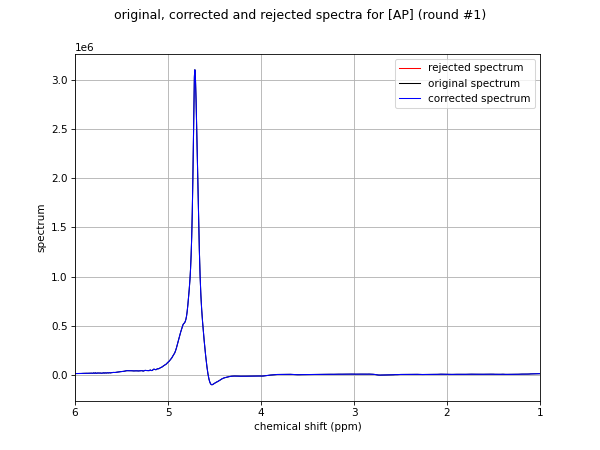

(INFO)  MRSData2.correct_analyze_and_reject_2d: * Final post-data-rejection SNR = 3402.11
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Final post-data-rejection linewidth = 21.97 Hz


analyzing: ██████████████████████████████ done.
correlating signals: ██████████████████████████████ done.


(INFO)  MRSData2.analyze_physio_2d: data timestamp=	39529942.5ms	10:58:49
(INFO)  MRSData2.analyze_physio_2d: best start time for...
(INFO)  MRSData2.analyze_physio_2d: amplitude=		39545307.5ms	10:59:05
(INFO)  MRSData2.analyze_physio_2d: linewidth=		39545504.5ms	10:59:05
(INFO)  MRSData2.analyze_physio_2d: frequency=		39548336.5ms	10:59:08
(INFO)  MRSData2.analyze_physio_2d: phase=		39548495.5ms	10:59:08
(INFO)  MRSData2.analyze_physio_2d: total=		39548473.5ms	10:59:08
(INFO)  MRSData2.analyze_physio_2d: max R for=		39548495.5ms	10:59:08


<IPython.core.display.Javascript object>


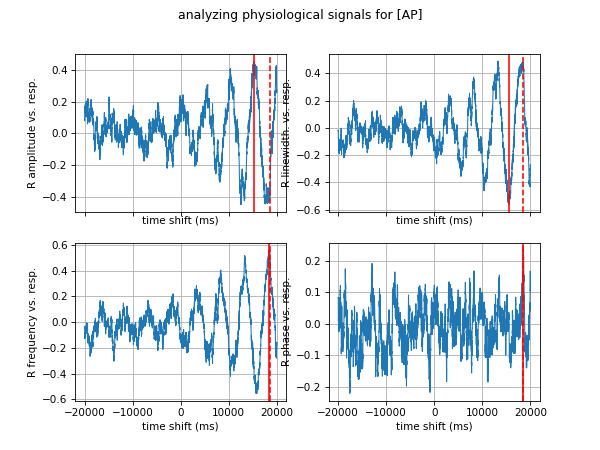

<IPython.core.display.Javascript object>


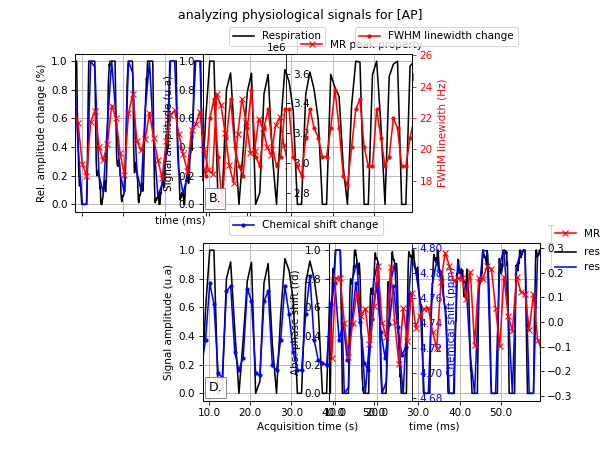

<IPython.core.display.Javascript object>


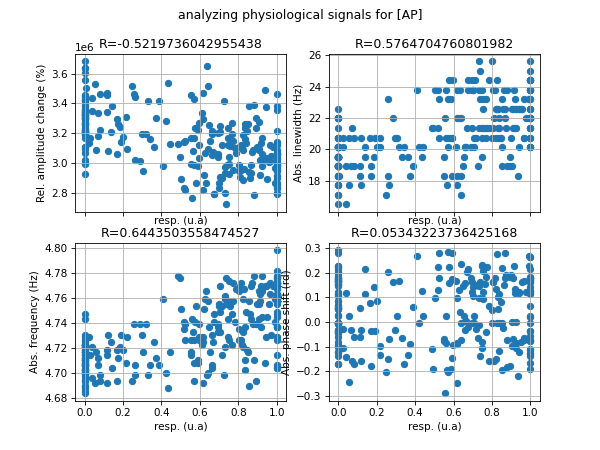

<IPython.core.display.Javascript object>


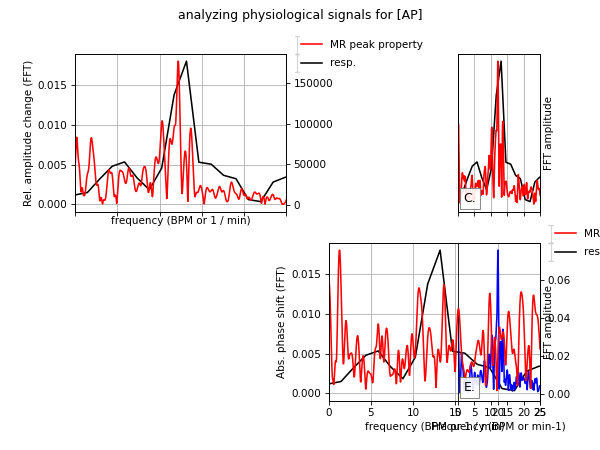

In [17]:
s.correct_analyze_and_reject_2d([4.6, 4.8], 1, {"amplitude (%)": None, "linewidth (Hz)": None, "chemical shift (ppm)": None, "phase std. factor (%)": None}, True, None, 0.0, True, [1, 6])
s.analyze_physio_2d([4.6, 4.8], 40000.0, True)

<IPython.core.display.Javascript object>


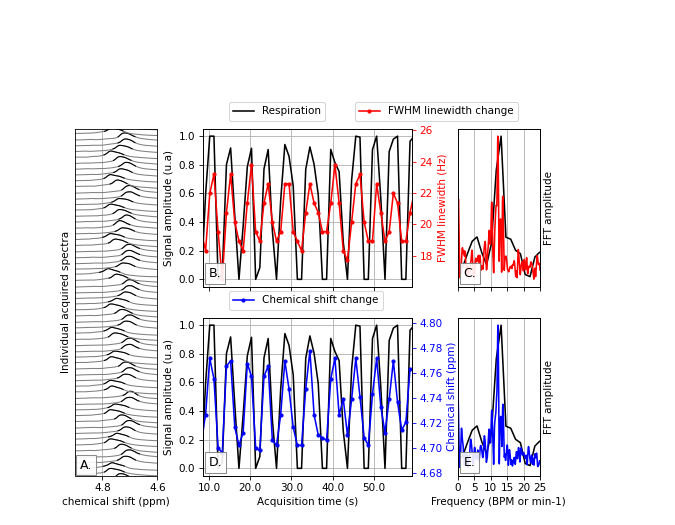

/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator


In [18]:
new_fig = plt.figure(400, figsize=(9,7))

new_fig.subplots_adjust(wspace=0.55, hspace=0.2)

# get invidual spectra fig
fig = plt.figure(162)
axs = fig.axes
ax = axs[-1]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(141)
ax.set_position(dummy.get_position())
dummy.remove()

# get linewidth
fig = plt.figure(101)
axs = fig.axes
ax = axs[1]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(2,4,(2,3))
ax.set_position(dummy.get_position())
dummy.remove()

ax = axs[5]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(2,4,(2,3))
ax.set_position(dummy.get_position())
dummy.remove()

# get chemical shift
fig = plt.figure(101)
axs = fig.axes
ax = axs[2]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(2,4,(6,7))
ax.set_position(dummy.get_position())
dummy.remove()

ax = axs[6]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(2,4,(6,7))
ax.set_position(dummy.get_position())
dummy.remove()

# convert time to seconds
ax = new_fig.axes[1]
orig_t = ax.get_xticks()
new_ylim = [3.96884e7, 3.97394e7]
if(ax.get_ylim() != new_ylim):
    orig_t = new_fig.axes[2].lines[0].get_xdata()
ax.set_xlim(new_ylim)
current_t = ax.get_xticks()
t = current_t / 1000.0 - current_t[0] / 1000.0
ax.set_xticklabels(t)

# remove raw resp lines
if(len(new_fig.axes[1].lines) > 1):
    new_fig.axes[1].lines[0].remove()
    new_fig.axes[3].lines[0].remove()

# change colors and style
for l in new_fig.axes[0].lines[0::2]:
    l.set_color("grey")
    
new_fig.axes[1].lines[0].set_color('k')
new_fig.axes[2].lines[0].set_color('r')
new_fig.axes[2].lines[0].set_marker('.')
new_fig.axes[3].lines[0].set_color('k')
new_fig.axes[4].lines[0].set_color('b')
new_fig.axes[4].lines[0].set_marker('.')

# labels
new_fig.axes[1].set_xlabel("")
new_fig.axes[3].set_xlabel("Acquisition time (s)")
new_fig.axes[1].lines[0].set_label("Respiration")
new_fig.axes[1].set_ylabel("Signal amplitude (u.a)")
new_fig.axes[2].lines[0].set_label("FWHM linewidth change")
new_fig.axes[2].set_ylabel("FWHM linewidth (Hz)")
new_fig.axes[2].yaxis.label.set_color('red')
new_fig.axes[2].tick_params(axis='y', colors='red')

new_fig.axes[3].lines[0].set_label("Respiration")
new_fig.axes[3].set_ylabel("Signal amplitude (u.a)")
new_fig.axes[4].lines[0].set_label("Chemical shift change")
new_fig.axes[4].set_ylabel("Chemical shift (ppm)")
new_fig.axes[4].yaxis.label.set_color('blue')
new_fig.axes[4].tick_params(axis='y', colors='blue')

# ylim invidual spectra
na_start = np.argmin(np.abs(np.linspace(orig_t[0], orig_t[-1], s.shape[0])  - current_t[0]))
na_stop = np.argmin(np.abs(np.linspace(orig_t[0], orig_t[-1], s.shape[0])  - current_t[-1]))

new_fig.axes[0].set_ylabel("Individual acquired spectra")
if(len(new_fig.axes[0].get_yticks()) > 0):
    yt_orig = new_fig.axes[0].get_yticks()
new_fig.axes[0].set_yticks([])
new_fig.axes[0].set_yticklabels([])

yt_start = yt_orig[-1]  * na_start / s.shape[0]
yt_stop = yt_orig[-1] * na_stop / s.shape[0]

new_fig.axes[0].set_ylim([yt_start, yt_stop])
new_fig.axes[0].set_xlim([4.9, 4.6])

# now the FFT plots
xlim = [0, 25]

# get linewidth FFT
fig = plt.figure(103)
axs = fig.axes
ax = axs[1]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(244)
ax.set_position(dummy.get_position())
dummy.remove()

# not ticks
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlim(xlim)
ax.set_xticks([0, 5, 10, 15, 20, 25])

# label
ax.set_ylabel("")
ax.set_xlabel("")

ax = axs[5]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(244)
ax.set_position(dummy.get_position())
dummy.remove()

# not ticks
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlim(xlim)

# label
ax.set_ylabel("FFT amplitude")
ax.set_xlabel("")

# get chemical shift FFT
fig = plt.figure(103)
axs = fig.axes
ax = axs[2]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(248)
ax.set_position(dummy.get_position())
dummy.remove()

# not ticks
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlim(xlim)

# label
ax.set_ylabel("")
ax.set_xlabel("Frequency (BPM or min-1)")

ax = axs[6]

ax.figure=new_fig
new_fig.axes.append(ax)
new_fig.add_axes(ax)

dummy = new_fig.add_subplot(248)
ax.set_position(dummy.get_position())
dummy.remove()

ax.lines[0].set_color('b')

# not ticks
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlim(xlim)

# label
ax.set_ylabel("FFT amplitude")
ax.set_xlabel("Frequency (BPM or min-1)")

# legend
new_fig.axes[1].legend().remove()
new_fig.axes[2].legend().remove()
new_fig.axes[3].legend().remove()
new_fig.axes[4].legend().remove()
new_fig.axes[5].legend().remove()
new_fig.axes[6].legend().remove()
new_fig.axes[7].legend().remove()
new_fig.axes[8].legend().remove()

new_fig.axes[1].legend(bbox_to_anchor=(0.1, 1.02, 1., .102), loc=3)
new_fig.axes[2].legend(bbox_to_anchor=(0.7, 1.02, 1., .102), loc=3)
new_fig.axes[4].legend(bbox_to_anchor=(0.1, 1.02, 1., .102), loc=3)

# annotations...
props = dict(boxstyle='square', facecolor='white', alpha=0.9, edgecolor='grey')

xlim = new_fig.axes[0].get_xlim()
ylim = new_fig.axes[0].get_ylim()
new_fig.axes[0].text(xlim[0] - (xlim[0]-xlim[1])*0.06, 
                     ylim[0] + (ylim[1]-ylim[0])*0.02, 
                     "A.",
                     fontsize=12,
                     bbox=props)

xlim = new_fig.axes[2].get_xlim()
ylim = new_fig.axes[2].get_ylim()
new_fig.axes[2].text(xlim[0] - (xlim[0]-xlim[1])*0.03, 
                     ylim[0] + (ylim[1]-ylim[0])*0.06, 
                     "B.",
                     fontsize=12,
                     bbox=props)

xlim = new_fig.axes[4].get_xlim()
ylim = new_fig.axes[4].get_ylim()
new_fig.axes[4].text(xlim[0] - (xlim[0]-xlim[1])*0.03, 
                     ylim[0] + (ylim[1]-ylim[0])*0.06, 
                     "D.",
                     fontsize=12,
                     bbox=props)

xlim = new_fig.axes[6].get_xlim()
ylim = new_fig.axes[6].get_ylim()
new_fig.axes[6].text(xlim[0] - (xlim[0]-xlim[1])*0.07, 
                     ylim[0] + (ylim[1]-ylim[0])*0.06, 
                     "C.",
                     fontsize=12,
                     bbox=props)

xlim = new_fig.axes[8].get_xlim()
ylim = new_fig.axes[8].get_ylim()
new_fig.axes[8].text(xlim[0] - (xlim[0]-xlim[1])*0.07, 
                     ylim[0] + (ylim[1]-ylim[0])*0.06, 
                     "E.",
                     fontsize=12,
                     bbox=props)


new_fig.savefig("./notebooks/figs/fig_resp.svg")